# Reference

Class Handout, Lee, Chia Jung professor, MDM64001, School of Big Data Management, Soochow University

# PCA vs LDA

### Data

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt


data = datasets.load_wine()
x = data['data']
y = data['target']

### Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)

In [3]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

### Modeling - PCA & LDA

In [14]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_std, y_train)
x_test_lda = lda.transform(x_test_std)

In [15]:
from sklearn.linear_model import LogisticRegression


lr_pca, lr_lda = LogisticRegression(random_state=1), LogisticRegression(random_state=1) 
lr_pca.fit(x_train_pca, y_train)
lr_lda.fit(x_train_lda, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
lr_pca.score(x_test_pca, y_test)

0.9777777777777777

In [17]:
lr_lda.score(x_test_lda, y_test)

0.9777777777777777

# PCA vs Kernel PCA

## Data 1

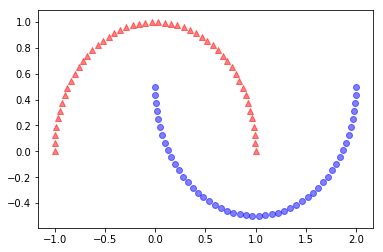

In [18]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt


x, y = make_moons(n_samples=100, random_state=123)
plt.scatter(x[y==0, 0], x[y==0, 1], color = 'red', marker = '^', alpha=0.5)
plt.scatter(x[y==1,0], x[y==1, 1], color = 'blue', marker = 'o', alpha=0.5)
plt.show()

### PCA

In [19]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

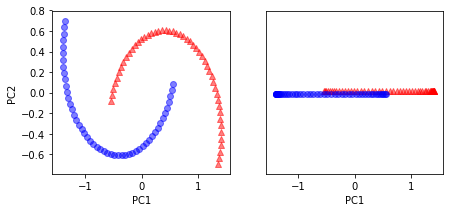

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(x_pca[y==0, 0], x_pca[y==0, 1], color = 'red', marker = '^', alpha=0.5)
ax[0].scatter(x_pca[y==1, 0], x_pca[y==1, 1], color = 'blue', marker = 'o', alpha=0.5)
ax[1].scatter(x_pca[y==0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha=0.5)
ax[1].scatter(x_pca[y==1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

### Kernel PCA

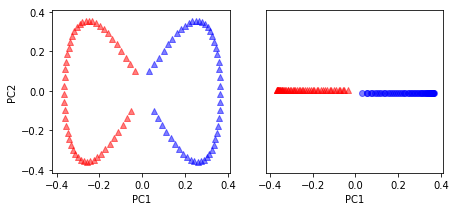

In [22]:
from sklearn.decomposition import KernelPCA


kpca = KernelPCA(n_components=2, kernel = 'rbf', gamma=15)
x_kpca = kpca.fit_transform(x)

fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(x_kpca[y == 0, 0], x_kpca[y == 0, 1], color = 'red', marker = '^',alpha=0.5)
ax[0].scatter(x_kpca[y == 1, 0], x_kpca[y == 1,1], color = 'blue', marker = '^', alpha=0.5)
ax[1].scatter(x_kpca[y == 0, 0], np.zeros((50, 1)) + 0.02, color = 'red', marker = '^', alpha=0.5)
ax[1].scatter(x_kpca[y == 1, 0], np.zeros((50, 1)) - 0.02, color = 'blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

## Data 2

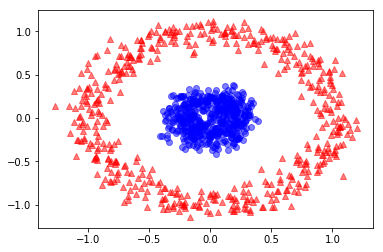

In [24]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt


x, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
plt.scatter(x[y==0, 0], x[y==0, 1], color = 'red', marker = '^', alpha=0.5)
plt.scatter(x[y==1, 0], x[y==1, 1], color = 'blue', marker = 'o', alpha=0.5)
plt.show()

### PCA

In [25]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x)

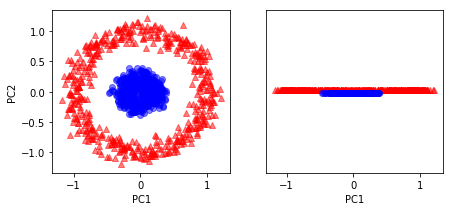

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(x_pca[y==0, 0], x_pca[y==0, 1], color = 'red', marker = '^', alpha=0.5)
ax[0].scatter(x_pca[y==1, 0], x_pca[y==1, 1], color = 'blue', marker = 'o', alpha=0.5)
ax[1].scatter(x_pca[y==0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha=0.5)
ax[1].scatter(x_pca[y==1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1, 1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

### Kernel PCA

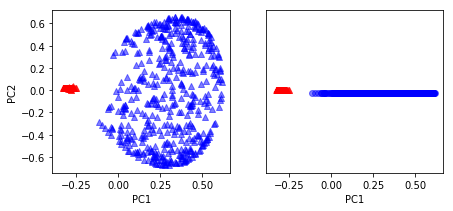

In [28]:
from sklearn.decomposition import KernelPCA


kpca = KernelPCA(n_components=2, kernel = 'rbf', gamma=15)
x_kpca = kpca.fit_transform(x)

fig, ax = plt.subplots(1, 2, figsize = (7, 3))
ax[0].scatter(x_kpca[y == 0, 0], x_kpca[y == 0, 1], color = 'red', marker = '^',alpha=0.5)
ax[0].scatter(x_kpca[y == 1, 0], x_kpca[y == 1,1], color = 'blue', marker = '^', alpha=0.5)
ax[1].scatter(x_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha=0.5)
ax[1].scatter(x_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha=0.5)
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')
ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
ax[1].set_xlabel('PC1')
plt.show()

# ICA

### Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
0    2000 non-null float64
1    2000 non-null float64
2    2000 non-null float64
3    2000 non-null float64
dtypes: float64(4)
memory usage: 62.6 KB
None


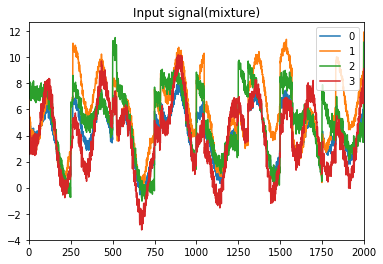

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal


df = pd.read_csv(r'C:\Users\user\Desktop\git_hub\finished\ml\dimension_reduction\code\mixture_of_signals.txt', header = None, sep = ' ')
print(df.info())
x = df.values
pd.DataFrame(x).plot(title = 'Input signal(mixture)')

### PCA

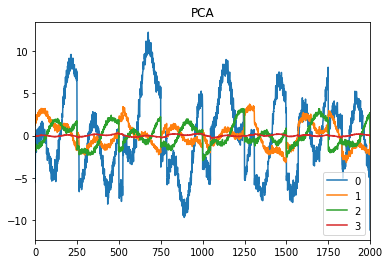

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
pca_x = pca.fit_transform(x)
pd.DataFrame(pca_x).plot(title = 'PCA')

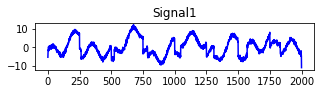

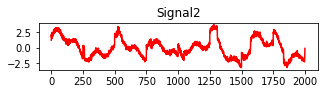

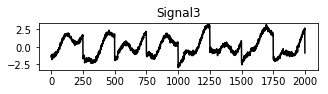

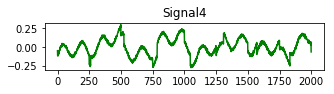

In [35]:
def plot_X(X):
    for i, (sig, color) in enumerate(zip(X.T, colors), 1):
        plt.figure(figsize = (5, 4))
        plt.subplot(4, 1, i)
        plt.title('Signal' + str(i))
        plt.plot(sig, color = color)
        
        
colors = ['blue', 'red', 'black', 'green']
plot_X(pca_x)

### ICA

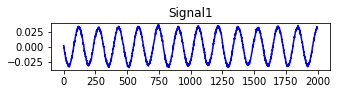

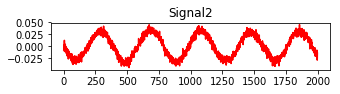

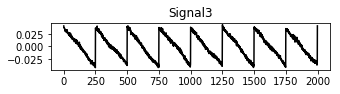

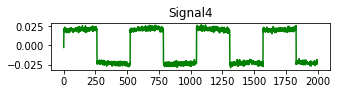

In [37]:
from sklearn.decomposition import FastICA


ica = FastICA(n_components=4)
ica_X = ica.fit_transform(x)
plot_X(ica_X)